In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kritikseth/fruit-and-vegetable-image-recognition")

print("Path to dataset files:", path)

100%|██████████| 1.98G/1.98G [00:22<00:00, 96.8MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/kritikseth/fruit-and-vegetable-image-recognition/versions/8


In [ ]:
import zipfile

In [ ]:
!kaggle datasets download -d "kritikseth/fruit-and-vegetable-image-recognition"

Dataset URL: https://www.kaggle.com/datasets/kritikseth/fruit-and-vegetable-image-recognition
License(s): CC0-1.0
 99% 1.96G/1.98G [00:27<00:00, 103MB/s]
100% 1.98G/1.98G [00:27<00:00, 76.5MB/s]


In [ ]:
with zipfile.ZipFile("fruit-and-vegetable-image-recognition.zip", 'r') as zip_ref:
    zip_ref.extractall()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tensorflow as tf

In [ ]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/train',
  labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False

    )

Found 3115 files belonging to 36 classes.


In [ ]:

validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


Found 351 files belonging to 36 classes.


In [ ]:
cnn=tf.keras.models.Sequential()

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.5))


In [ ]:
cnn.add(tf.keras.layers.Flatten())

In [ ]:
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))

In [ ]:
cnn.add(tf.keras.layers.Dense(units=36,activation='softmax'))

In [ ]:
cnn.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
training_history=cnn.fit(training_set,validation_data=validation_set,epochs=30)

Epoch 1/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 67s 635ms/step - accuracy: 0.0370 - loss: 35.0252 - val_accuracy: 0.0484 - val_loss: 17.4030
Epoch 2/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 61s 630ms/step - accuracy: 0.0370 - loss: 4.8253 - val_accuracy: 0.0969 - val_loss: 3.4475
Epoch 3/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 60s 611ms/step - accuracy: 0.0697 - loss: 3.9114 - val_accuracy: 0.1140 - val_loss: 3.3462
Epoch 4/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 79s 590ms/step - accuracy: 0.1033 - loss: 4.0654 - val_accuracy: 0.3048 - val_loss: 3.0598
Epoch 5/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 60s 610ms/step - accuracy: 0.1561 - loss: 3.8351 - val_accuracy: 0.3675 - val_loss: 2.7398
Epoch 6/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 83s 614ms/step - accuracy: 0.1820 - loss: 4.0012 - val_accuracy: 0.4615 - val_loss: 2.4056
Epoch 7/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 83s 626ms/step - accuracy: 0.2634 - loss: 3.4553 - val_accuracy: 0.3647 - val_loss: 2.9598
Epoch 8/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 60s 607ms/step - accuracy: 0.2885 - loss: 3.2467 - val_ac

In [ ]:
cnn.save('trained_model.h5')

In [ ]:
import json
with open('trained_hist.json','w') as f:
  json.dump(str(training_history.history),f)

In [ ]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [ ]:
training_history.history['val_accuracy'][-1]

0.8632478713989258

Text(0.5, 0, 'Epochs')

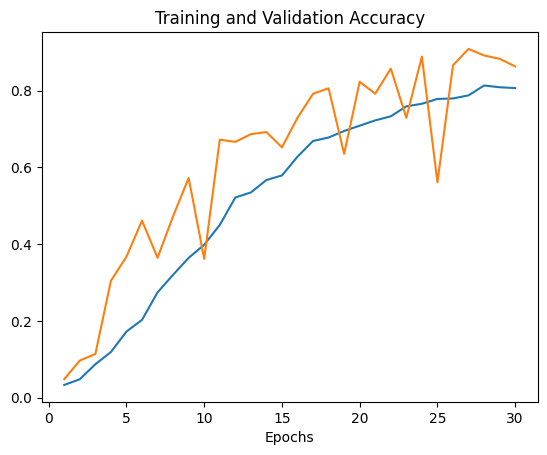

In [ ]:
epochs =[i for i in range(1,31)]
plt.plot(epochs,training_history.history['accuracy'],label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')